In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trips = pd.read_csv('../data/complete_scheduled_trips')

In [3]:
trips['ADHERENCE'].corr(trips['SCHEDULED_HDWY'])

0.0340293224389717

In [4]:
trips['ADHERENCE'].describe()

count    337693.000000
mean         -3.165075
std           6.865854
min        -948.533333
25%          -4.550000
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

There are some extreme outliers (I don't think we've got an answer on that one) but by and large buses keep fairly close to the schedule. A bus is considered late if it's more than 6 minutes past the scheduled time (the negative values are past the scheduled time, and understandably leaving a timepoint early is not preferable either) hence the skewed distribution on the negative side.

<Axes: ylabel='Frequency'>

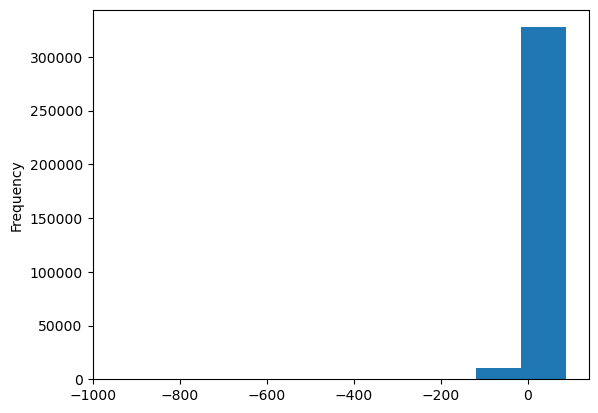

In [5]:
trips['ADHERENCE'].plot(kind = 'hist')

In [6]:
trips['SCHEDULED_HDWY'].describe()

count    273247.000000
mean         18.191439
std          12.277501
min           0.000000
25%          10.000000
50%          15.000000
75%          20.000000
max         503.000000
Name: SCHEDULED_HDWY, dtype: float64

<Axes: ylabel='Frequency'>

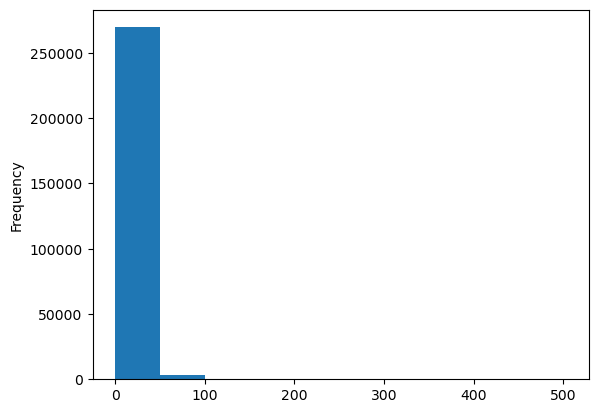

In [7]:
trips['SCHEDULED_HDWY'].plot(kind = 'hist')

<Axes: xlabel='ADHERENCE', ylabel='HDWY_DEV'>

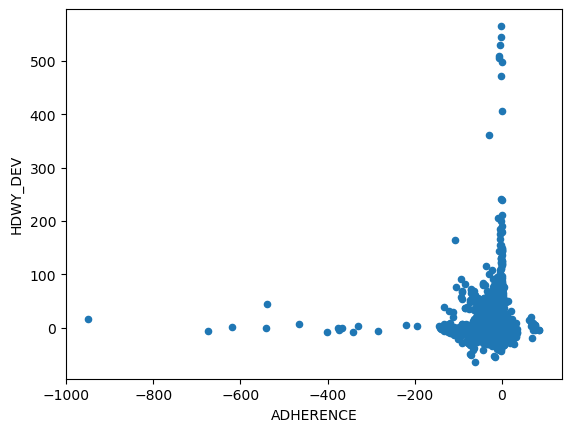

In [8]:
trips.plot(x = 'ADHERENCE', y = 'HDWY_DEV', kind = 'scatter')

In [9]:
trips['HDWY_DEV'].describe()

count    264974.000000
mean          0.516921
std           7.131547
min         -64.000000
25%          -2.316667
50%           0.033333
75%           2.483333
max         565.433333
Name: HDWY_DEV, dtype: float64

In [10]:
trips['ADHERENCE'].corr(trips['HDWY_DEV'])

-0.2090114145752749

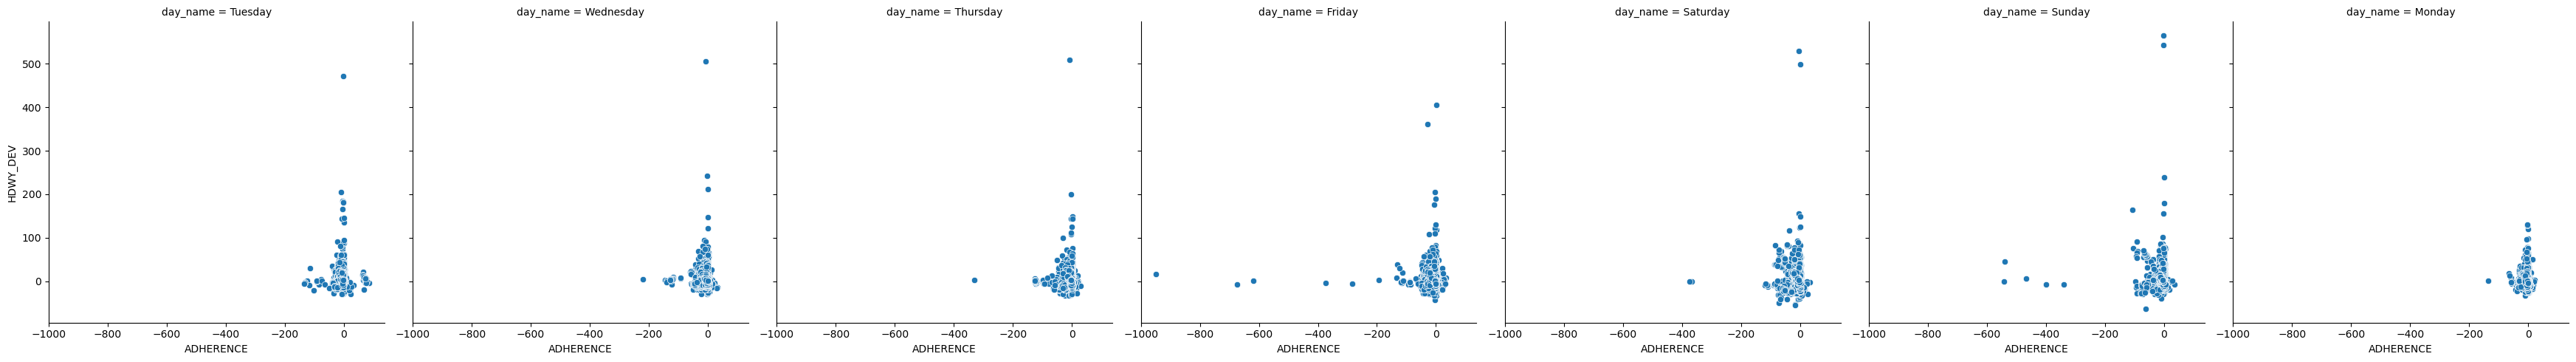

In [12]:
sns.relplot(data = trips, x = 'ADHERENCE', y = 'HDWY_DEV', kind = 'scatter', col = 'day_name')

day of week seems to have little impact, but there are extreme outliers at roughly 400-500 minutes headway deviation every day except Monday. Theoretically headway deviation should smooth out variation in expected headway, so do those outliers warrant closer examination? Interestingly, they're not actually *late* according to scheduled arrival time so it might just be a few stops that aren't part of the regular route. 500 minutes is 8 hours. The lack of these outliers on Monday is puzzling. If it was due to special school or work stops I would expect Monday through Friday. Most of the extreme values for adherance were on Friday and Saturday.

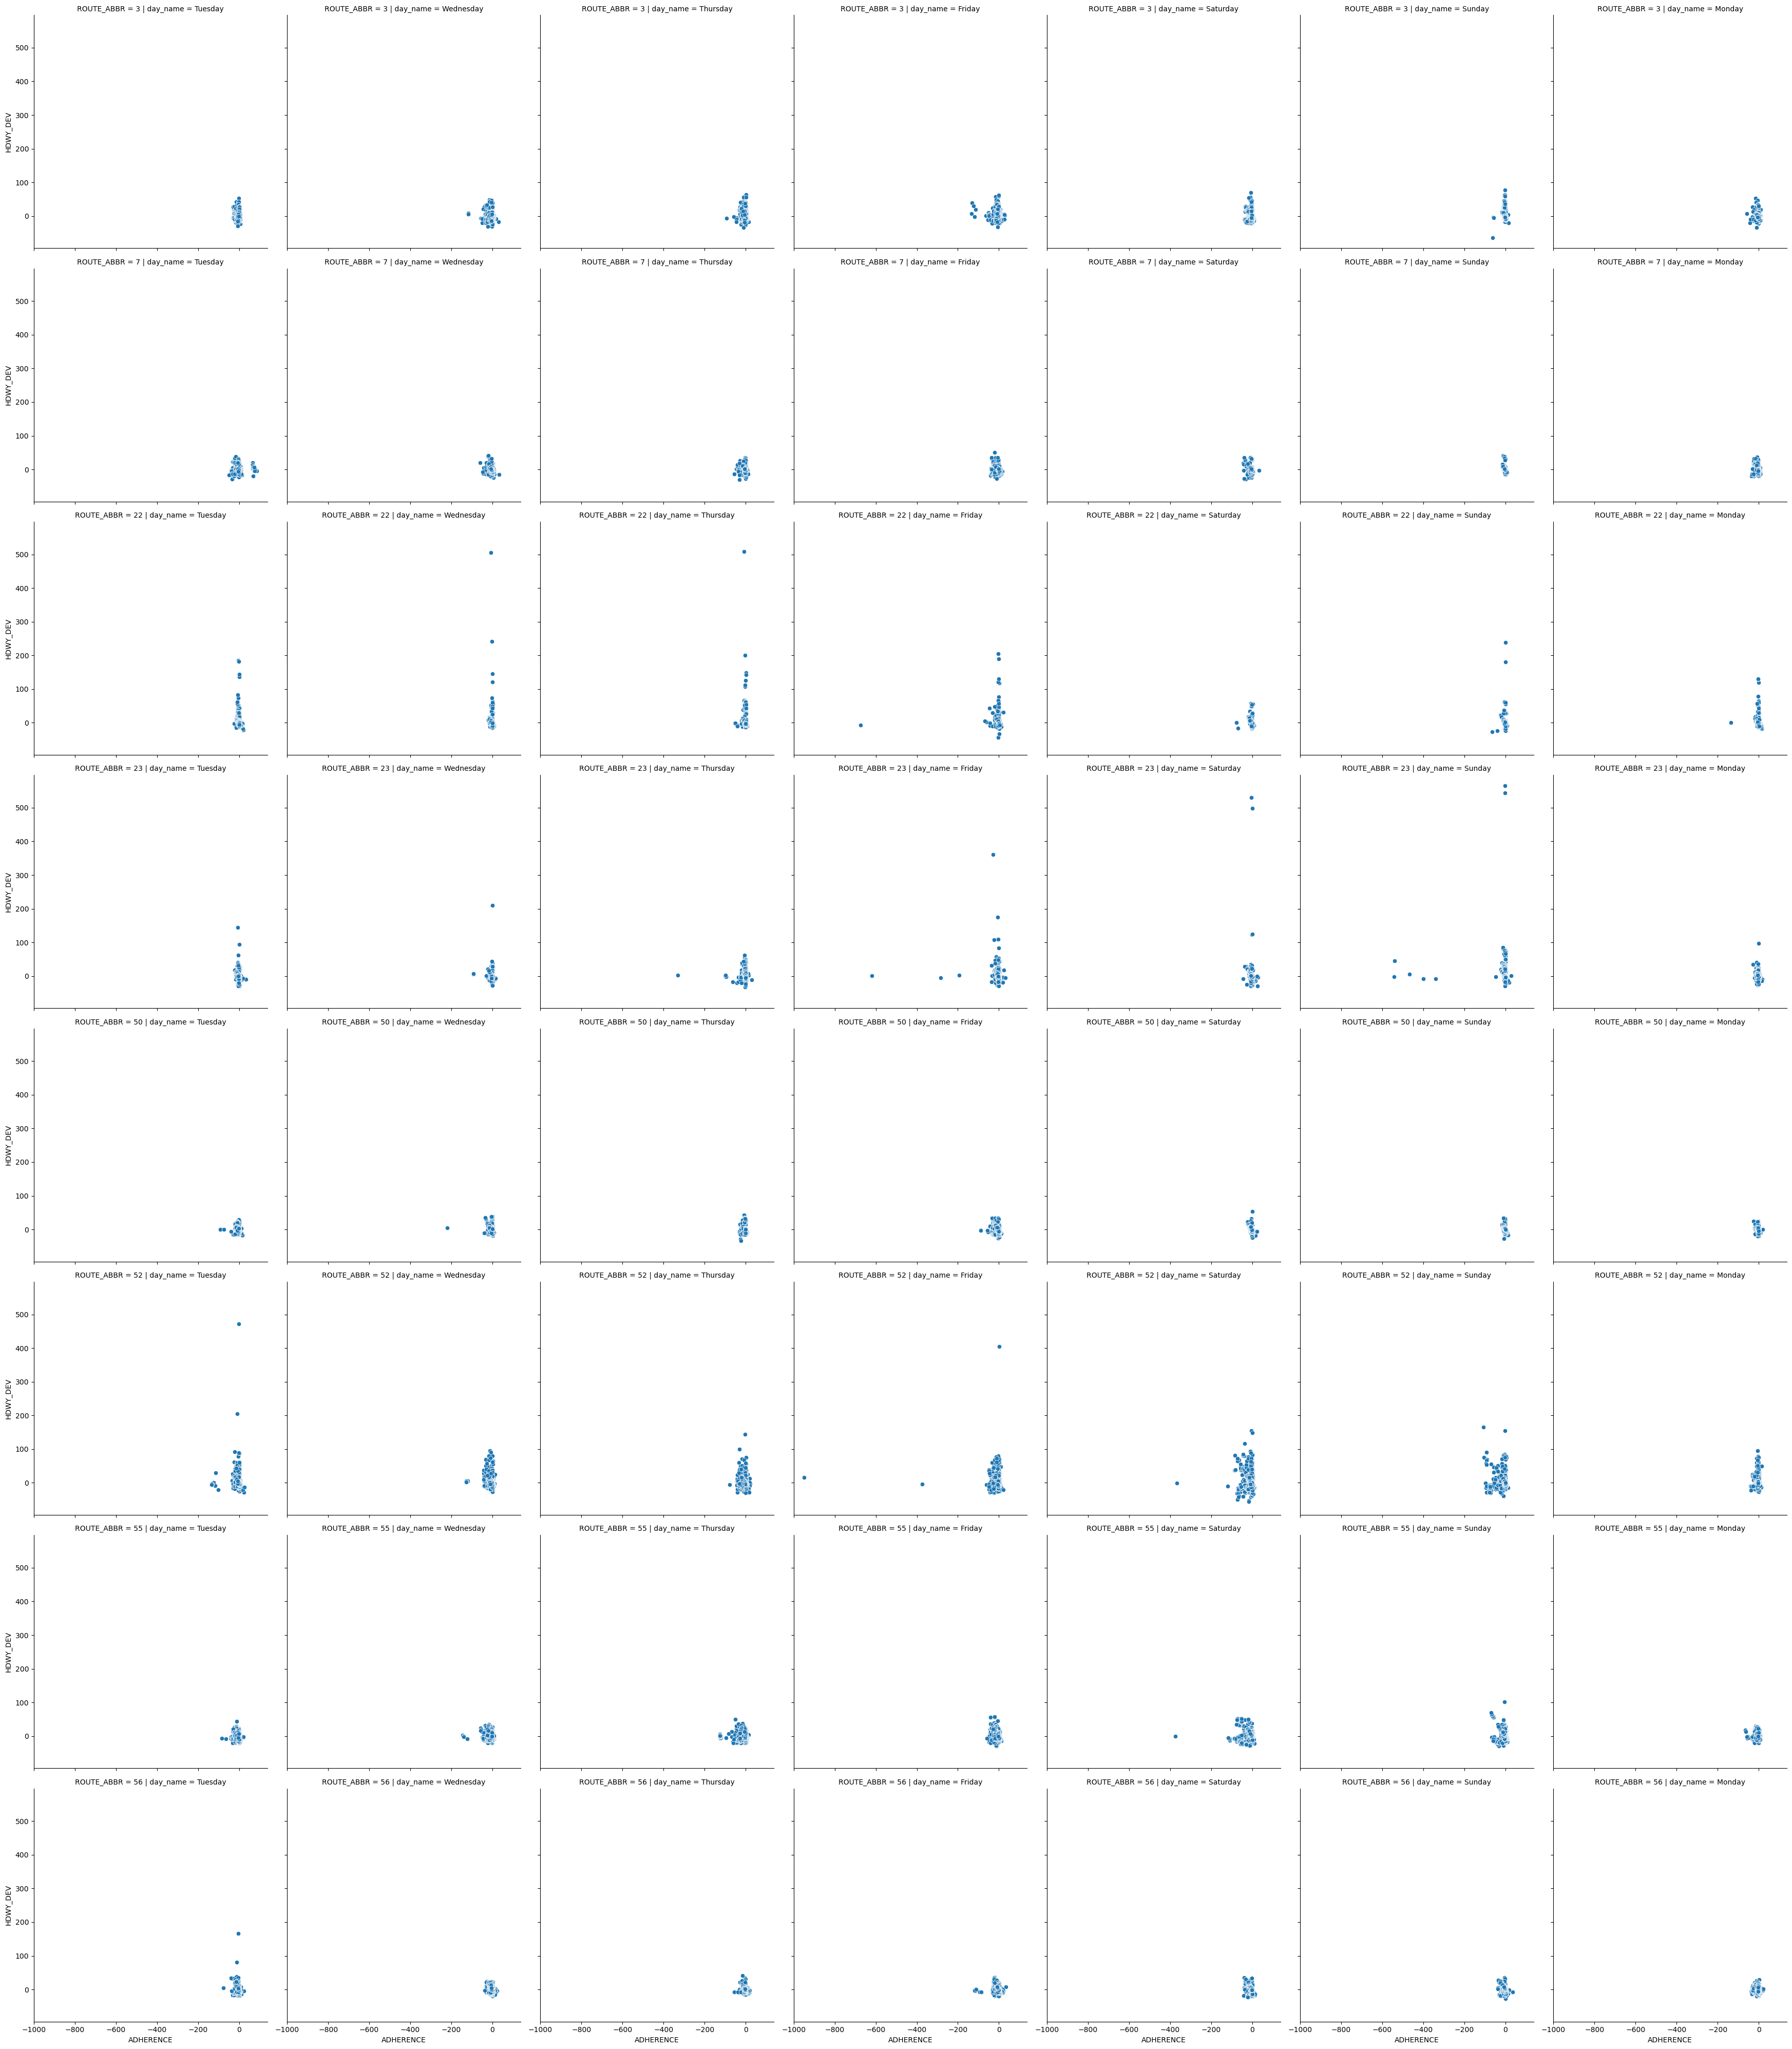

In [13]:
sns.relplot(data = trips, x = 'ADHERENCE', y = 'HDWY_DEV', kind = 'scatter', col = 'day_name', row = 'ROUTE_ABBR')